In [ ]:
# !pip install sympy 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sympy

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy.linalg import qr, eig, inv, matrix_rank, inv, svd
from sympy import Matrix, init_printing, Symbol
from os import listdir, getcwd
from os.path import isfile, join
from random import randint
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

Dataset source:


1. https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX09KMEN/labs/data/boats.zip
2. https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX09KMEN/labs/data/peds.zip
3. https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX09KMEN/labs/data/traffic.zip


In [4]:
import glob
import shutil
import os
import zipfile

fileList = ["dataset\zipFile\\boats.zip", "dataset\zipFile\peds.zip", "dataset\zipFile\\traffic.zip"]

for i in fileList:
  src_dir = "dataset\zipFile"
  dst_dir = "dataset"
  with zipfile.ZipFile(i, 'r') as zip_ref:
      zip_ref.extractall(dst_dir)

In [17]:
mypath = "dataset\peds"
files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
print("Number of files: {}".format(len(files)))

Number of files: 170


In [16]:
# Read image
img = Image.open(files[0])
I = np.array(img)
Length, Width = I.shape
print("Length: {}".format(Length))
print("Width: {}".format(Width))

Length: 152
Width: 232


In [18]:
X = np.zeros((len(files),Length*Width))
for i,file in enumerate(files):
    img = Image.open(file)
    I = np.array(img)
    X[i, :] = I.reshape(1, -1)

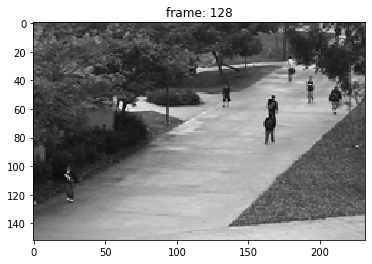

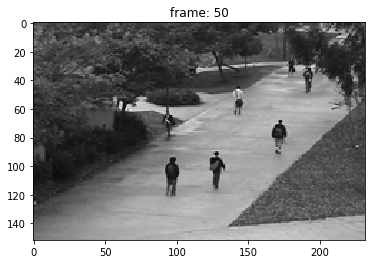

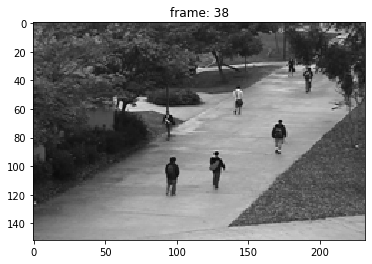

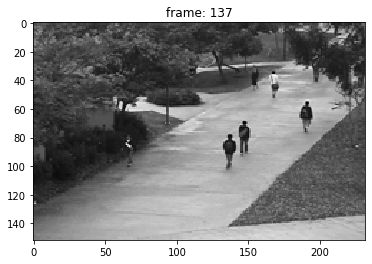

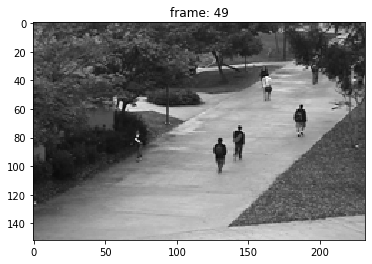

In [25]:
for i in range(5):
    frame=randint(0, X.shape[0]-1)
    plt.imshow(X[randint(0, X.shape[0]-1),:].reshape(Length,Width),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

In [26]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(s)

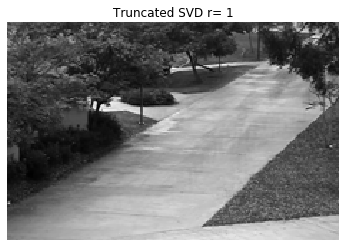

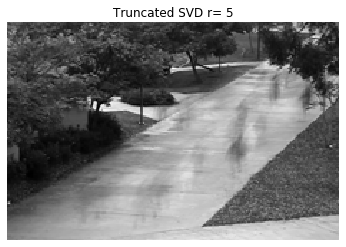

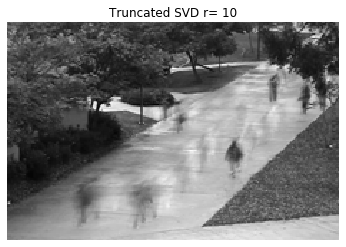

In [36]:
j=0

for r in (1, 5, 10):
    Xapprox = U[:, :r] @ S[0:r, 0:r] @ VT[:r, :]
    # plt.figure(j+1)
    # j = j+1
    img = plt.imshow(Xapprox[0,:].reshape(Length,Width),cmap="gray")
    plt.title('Truncated SVD r= {}'.format(r))
    plt.axis('off')
    plt.show()

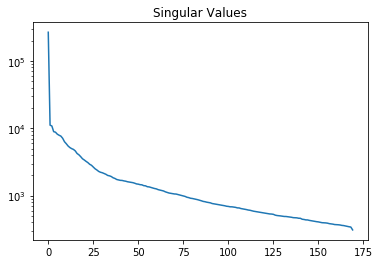

In [37]:
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

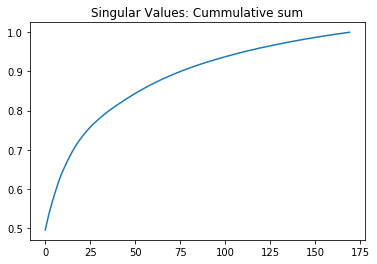

In [38]:
plt.plot(np.cumsum(np.diag(S)/np.sum(np.diag(S))))
plt.title("Singular Values: Cummulative sum")
plt.show()

In [41]:
def get_input(path):
    mypath = path
    files = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    print("Number of Img: {}".format(len(files)))
    # Read image
    img = Image.open(files[0])
    I = np.array(img)
    Length, Width = I.shape
    print("Img Length: {}".format(Length))
    print("Img Width: {}".format(Width))

    X = np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file)
        I = np.array(img)
        X[i, :] = I.reshape(1, -1)

    return X, Length, Width

In [42]:
Xb, Lengthb, Widthb = get_input("dataset\\boats")

Number of Img: 31
Img Length: 224
Img Width: 344


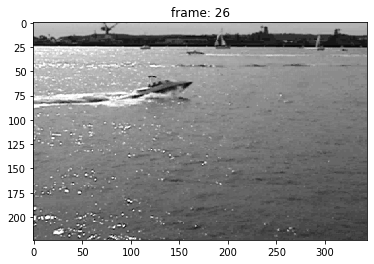

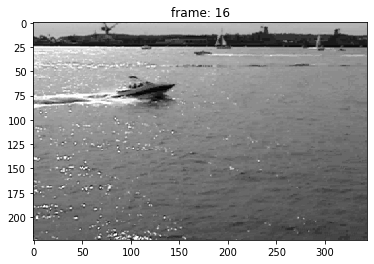

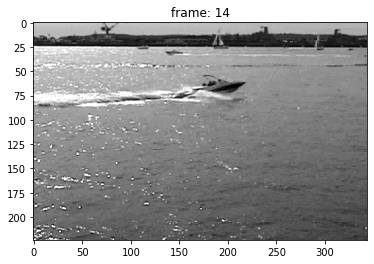

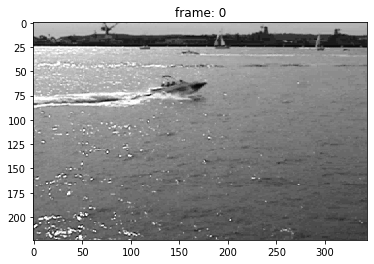

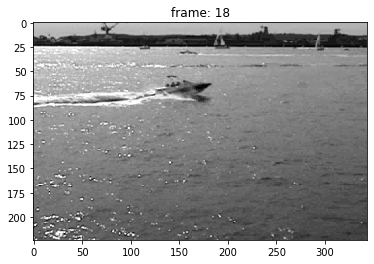

In [43]:
for i in range(5):
    frame=randint(0, Xb.shape[0]-1)
    plt.imshow(Xb[randint(0, Xb.shape[0]-1),:].reshape(Lengthb,Widthb),cmap="gray")
    plt.title("frame: "+str(frame))
    plt.show()

In [44]:
Ub, sb, VTb = np.linalg.svd(Xb, full_matrices=False)
Sb = np.diag(sb)

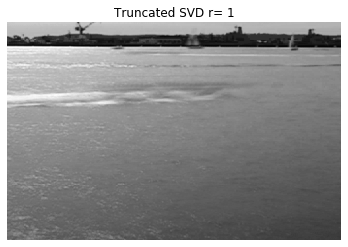

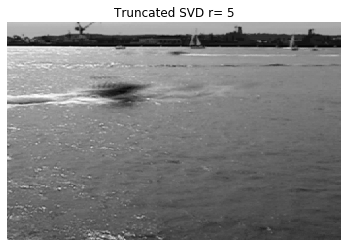

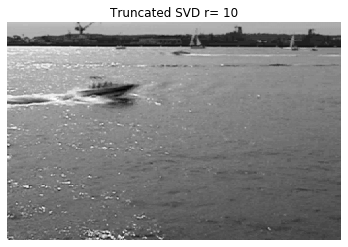

In [45]:
for r in (1, 5, 10):
    Xbapprox = Ub[:, :r] @ Sb[0:r, 0:r] @ VTb[:r, :]
    img = plt.imshow(Xbapprox[0,:].reshape(Lengthb,Widthb),cmap="gray")
    plt.title('Truncated SVD r= {}'.format(r))
    plt.axis('off')
    plt.show()

Number of Img: 190
Img Length: 282
Img Width: 378


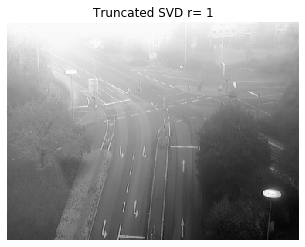

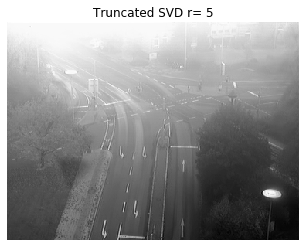

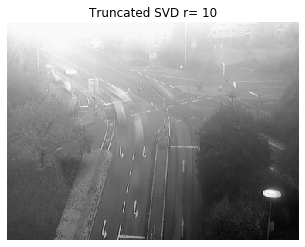

In [47]:
Xt, Lengtht, Widtht = get_input("dataset\\traffic")
# for i in range(5):
#     frame=randint(0, Xt.shape[0]-1)
#     plt.imshow(Xt[randint(0, Xt.shape[0]-1),:].reshape(Lengtht,Widtht),cmap="gray")
#     plt.title("frame: "+str(frame))
#     plt.show()
Ut, st, VTt = np.linalg.svd(Xt, full_matrices=False)
St = np.diag(st)
for r in (1, 5, 10):
    Xtapprox = Ut[:, :r] @ St[0:r, 0:r] @ VTt[:r, :]
    img = plt.imshow(Xtapprox[0,:].reshape(Lengtht,Widtht),cmap="gray")
    plt.title('Truncated SVD r= {}'.format(r))
    plt.axis('off')
    plt.show()